In [ ]:
!unzip Ford AIML Assessment - 2022.zip

unzip:  cannot find or open Ford, Ford.zip or Ford.ZIP.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df= pd.read_excel('/content/Crimes Data.xlsx')

In [ ]:
df.shape

(161942, 14)

In [ ]:
df.head()

,ID,Case Number,Date,Address,Crime Type Code,Primary Crime Type,Crime Description,Location Type,Arrest,Domestic Crime,Beat,District Code,Ward Number,Community Area Code
0,11798117,JC397040,2019-08-17 23:59:00,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,2019-08-17 23:59:00,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,2019-08-17 23:57:00,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,2019-08-17 23:55:00,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,2019-08-17 23:45:00,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46


In [ ]:
df.tail()

,ID,Case Number,Date,Address,Crime Type Code,Primary Crime Type,Crime Description,Location Type,Arrest,Domestic Crime,Beat,District Code,Ward Number,Community Area Code
161937,11649827,JC218222,2019-01-01,027XX S TRIPP AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1031,10,22.0,30
161938,11673881,JC246843,2019-01-01,013XX W 72ND PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,734,7,6.0,67
161939,11643551,JC210380,2019-01-01,045XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3
161940,11583562,JC137815,2019-01-01,045XX N GREENVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,1912,19,47.0,3
161941,11552674,JC100085,2019-01-01,092XX S NORMAL AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2223,22,21.0,73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161942 entries, 0 to 161941
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   161942 non-null  int64         
 1   Case Number          161942 non-null  object        
 2   Date                 161942 non-null  datetime64[ns]
 3   Address              161942 non-null  object        
 4   Crime Type Code      161942 non-null  object        
 5   Primary Crime Type   161942 non-null  object        
 6   Crime Description    161942 non-null  object        
 7   Location Type        161373 non-null  object        
 8   Arrest               161942 non-null  bool          
 9   Domestic Crime       161942 non-null  bool          
 10  Beat                 161942 non-null  int64         
 11  District Code        161942 non-null  int64         
 12  Ward Number          161935 non-null  float64       
 13  Community Area

In [ ]:
df.isnull().sum()

ID                       0
Case Number              0
Date                     0
Address                  0
Crime Type Code          0
Primary Crime Type       0
Crime Description        0
Location Type          569
Arrest                   0
Domestic Crime           0
Beat                     0
District Code            0
Ward Number              7
Community Area Code      0
dtype: int64

EDA and Visualisation 

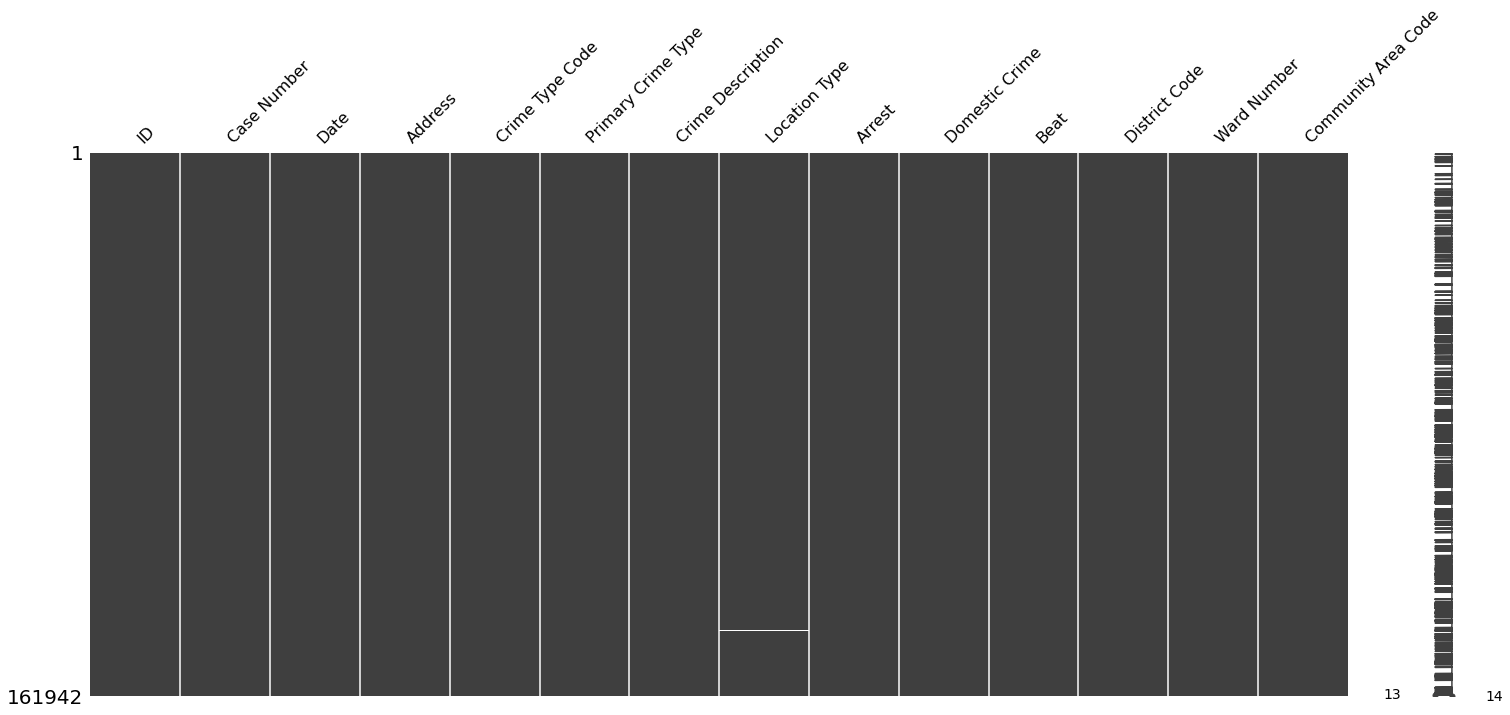

In [ ]:
import matplotlib.pyplot as plt

import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
df.drop(columns=['Case Number','Crime Type Code','Arrest'],inplace=True)

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [ ]:
df['new']=df['Primary Crime Type']

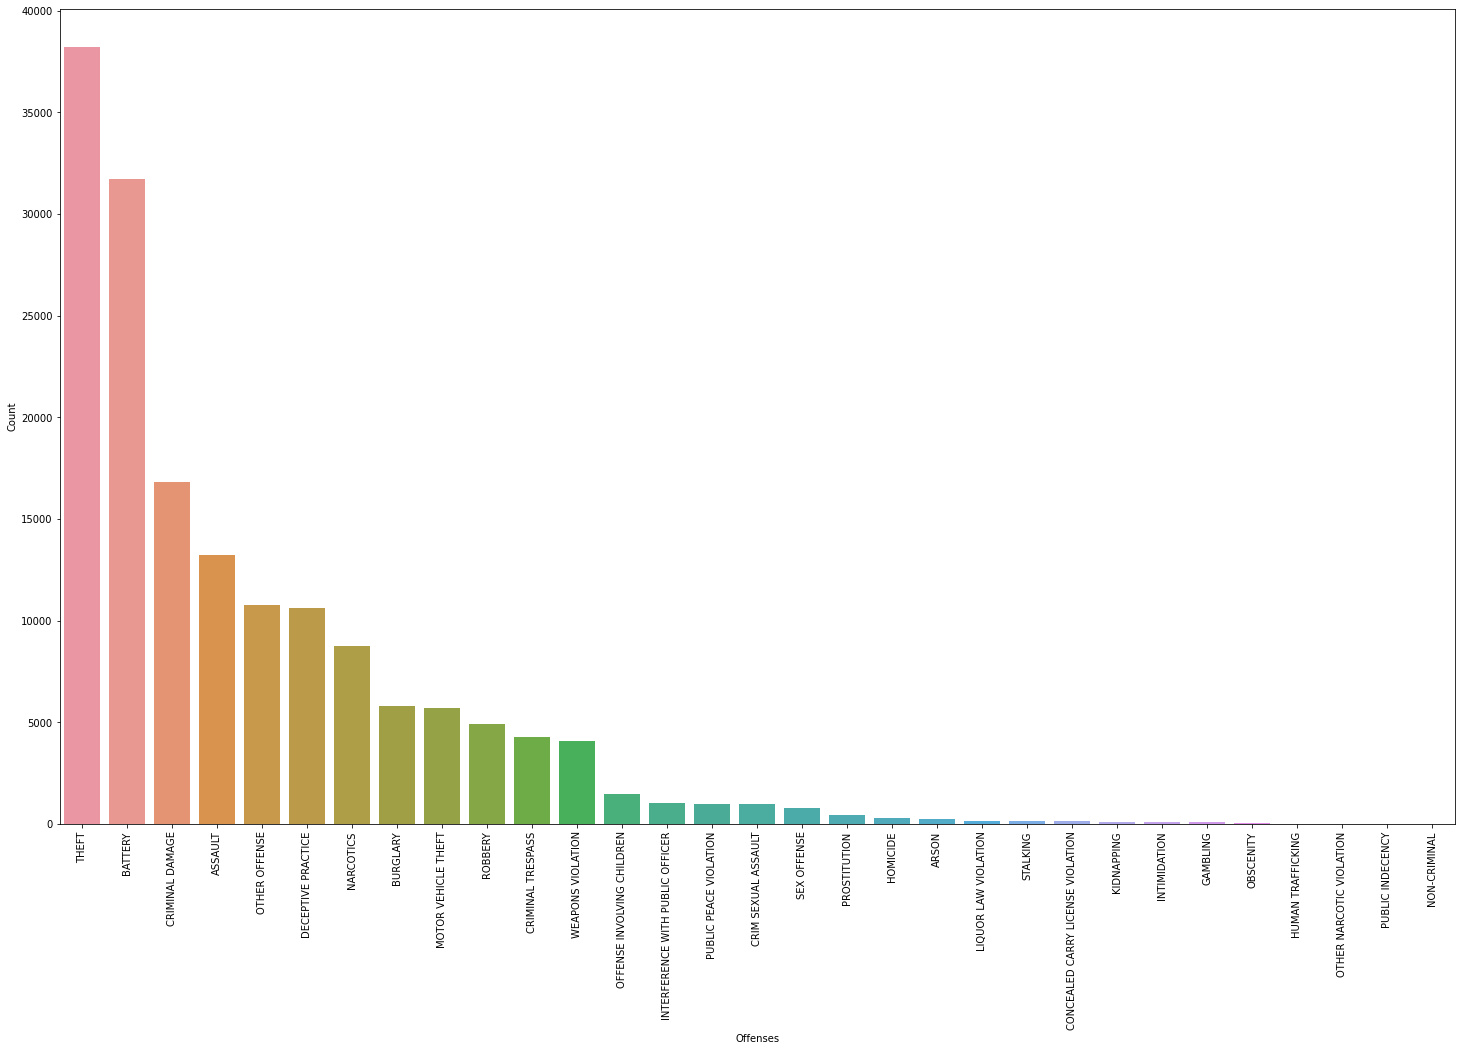

In [ ]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df.new.unique()]
df2["Count"]=[len(df[df.new==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

In [ ]:
df['location']=df['District Code']

In [ ]:
df['description']=df['Crime Description']

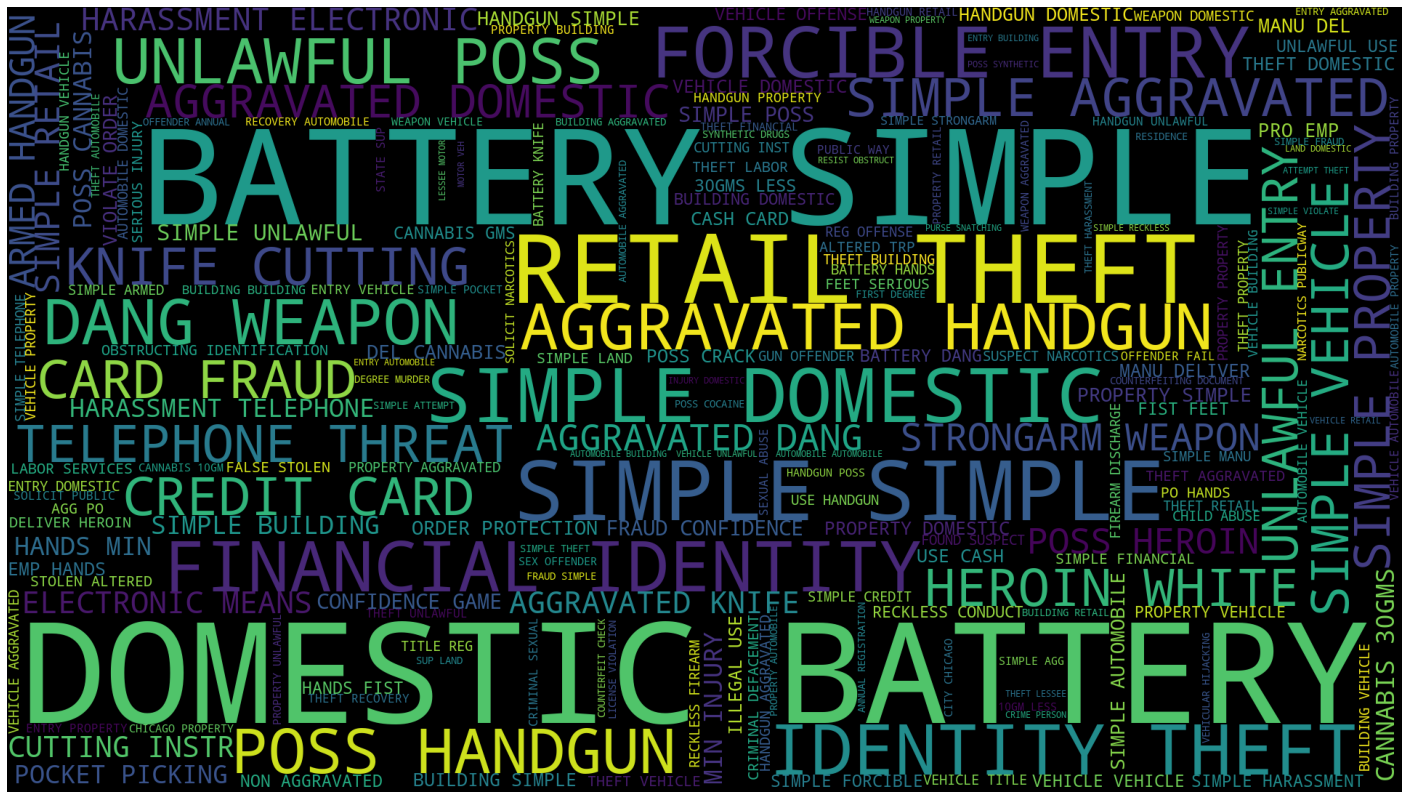

In [ ]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

                 ID           Beat  District Code    Ward Number  \
count  1.619420e+05  161942.000000  161942.000000  161935.000000   
mean   1.165604e+07    1133.964555      11.111311      23.355000   
std    5.126516e+05     695.570169       6.946305      13.934785   
min    2.436800e+04     111.000000       1.000000       1.000000   
25%    1.161715e+07     611.000000       6.000000      10.000000   
50%    1.167888e+07    1024.000000      10.000000      24.000000   
75%    1.173948e+07    1713.000000      17.000000      34.000000   
max    1.180480e+07    2535.000000      25.000000      50.000000   

       Community Area Code  
count        161942.000000  
mean             36.554995  
std              21.365744  
min               0.000000  
25%              23.000000  
50%              32.000000  
75%              53.000000  
max              77.000000  


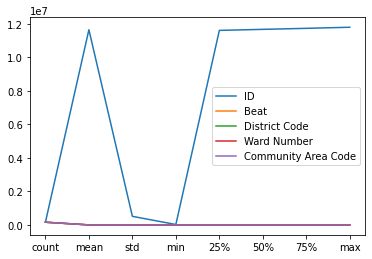

In [8]:
def plot_save(filename, index):
    plt.savefig('new.png')

    
print(df.describe())
df.describe().plot()
plot_save('describe_dataset', '0')

In [9]:
crime_describe = df.describe()
type(crime_describe)

pandas.core.frame.DataFrame

In [10]:
crime_describe

,ID,Beat,District Code,Ward Number,Community Area Code
count,1.619420e+05,161942.000000,161942.000000,161935.000000,161942.000000
mean,1.165604e+07,1133.964555,11.111311,23.355000,36.554995
std,5.126516e+05,695.570169,6.946305,13.934785,21.365744
min,2.436800e+04,111.000000,1.000000,1.000000,0.000000
25%,1.161715e+07,611.000000,6.000000,10.000000,23.000000
50%,1.167888e+07,1024.000000,10.000000,24.000000,32.000000
75%,1.173948e+07,1713.000000,17.000000,34.000000,53.000000
max,1.180480e+07,2535.000000,25.000000,50.000000,77.000000


In [11]:
df['Beat'].sum()

183636488

In [13]:
import seaborn as sns

In [30]:
gender_wise = df[['Date', 'Beat','district']]

In [31]:
cities = gender_wise.groupby('district')['Beat'].sum()

In [32]:
cities.describe()

count    2.200000e+01
mean     8.347113e+06
std      4.860247e+06
min      1.153068e+06
25%      5.712121e+06
50%      7.923799e+06
75%      1.088561e+07
max      1.989666e+07
Name: Beat, dtype: float64

In [37]:
cities_describe = cities.describe()
cities_describe

count    2.200000e+01
mean     8.347113e+06
std      4.860247e+06
min      1.153068e+06
25%      5.712121e+06
50%      7.923799e+06
75%      1.088561e+07
max      1.989666e+07
Name: Beat, dtype: float64

Model building

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
crimes=list(df1)

In [106]:
# define X and y
feature_cols = ['ID','Arrest', 'Domestic Crime', 'Beat', 
                'District Code', 'Ward Number', 'Community Area Code']
X = df1[feature_cols]
y = df1.Beat


In [107]:
from imblearn.over_sampling import SMOTE
    
sm= SMOTE()
X_res, y_res = sm.fit_resample(X,y )

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='entropy', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=300,
                       random_state=1)

In [114]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
3,Beat,1.0
0,ID,0.0
1,Arrest,0.0
2,Domestic Crime,0.0
4,District Code,0.0
5,Ward Number,0.0
6,Community Area Code,0.0


In [115]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[ 223 2511 2233 ... 1913 2511 1935]


Mean Square

In [116]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

4431.411831712026

Accuracy

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='gini', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

In [118]:
metrics.accuracy_score(y_test, y_pred)

0.027702164298434667

Log loss

In [119]:
pred = treeclf.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

4.963015467707752

Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight=None)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [122]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

Model evaluation

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [124]:
print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

         111       0.00      0.00      0.00      1343
         112       0.19      1.00      0.32      1408
         113       0.00      0.00      0.00      1366
         114       0.00      0.00      0.00      1335
         121       0.00      0.00      0.00      1404
         122       0.03      0.03      0.03      1418
         123       0.00      0.00      0.00      1363
         124       0.00      0.00      0.00      1374
         131       0.23      0.99      0.37      1403
         132       0.00      0.00      0.00      1397
         133       0.00      0.00      0.00      1355
         211       0.00      0.00      0.00      1410
         212       0.00      0.00      0.00      1383
         213       0.00      0.00      0.00      1373
         214       0.00      0.00      0.00      1361
         215       0.00      0.00      0.00      1362
         221       0.61      0.60      0.60      1389
         222       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [125]:
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

         111       0.00      0.00      0.00       725
         112       0.18      1.00      0.30       660
         113       0.00      0.00      0.00       702
         114       0.00      0.00      0.00       733
         121       0.00      0.00      0.00       664
         122       0.03      0.04      0.03       650
         123       0.00      0.00      0.00       705
         124       0.00      0.00      0.00       694
         131       0.22      0.99      0.35       665
         132       0.00      0.00      0.00       671
         133       0.00      0.00      0.00       713
         211       0.00      0.00      0.00       658
         212       0.00      0.00      0.00       685
         213       0.00      0.00      0.00       695
         214       0.00      0.00      0.00       707
         215       0.00      0.00      0.00       706
         221       0.65      0.62      0.63       679
         222       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


K-Nearest Neighbor

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=300)

In [127]:
y_pred = knn.predict(X_test)

In [128]:
metrics.accuracy_score(y_test, y_pred)

0.07228767467605046

In [129]:
pred = knn.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

4.653108650376548

Ensemble Methods

Random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc = RandomForestClassifier(criterion='gini',
                             min_samples_split=500,
                            n_estimators=10,
                            n_jobs=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=500, n_estimators=10, n_jobs=2)

In [132]:
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.9526656648252037

In [133]:
pred = rfc.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

0.48755421809198646

Adaboost

In [134]:
from sklearn.ensemble import AdaBoostClassifier

In [135]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=500, 
                         learning_rate=0.1, 
                         random_state=0)

In [136]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

KeyboardInterrupt: ignored